<a href="https://colab.research.google.com/github/SiracencoSerghei/Statistics_and_ML/blob/main/2.8_correlation/stats_corr_corrcoef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECTION: Correlation
# Correlation coefficient

In [3]:
# import libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

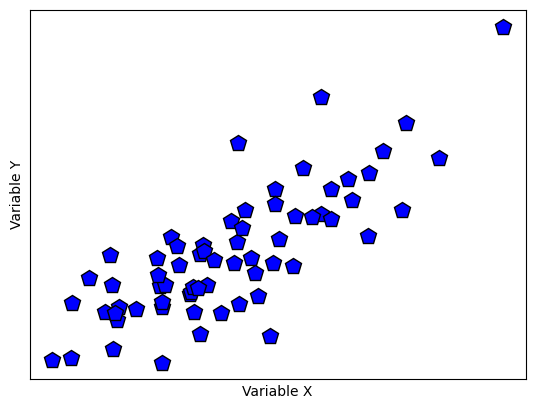

In [7]:
## simulate data

N = 66

# generate correlated data
x = np.random.randn(N)
# y = x + np.random.randn(N)*0.009
y = x + np.random.randn(N)

# plot the data
plt.plot(x,y,'kp',markerfacecolor='b',markersize=12)
plt.xlabel('Variable X')
plt.ylabel('Variable Y')
plt.xticks([])
plt.yticks([])
plt.show()

In [14]:
## compute covariance

# precompute the means
meanX = np.mean(x)
meanY = np.mean(y)

### the loop method
covar1 = 0
for i in range(N):
    covar1 = covar1 + (x[i]-meanX)*(y[i]-meanY)


# and now for the normalization
covar1 = covar1/(N-1)

### the linear algebra method
xCent = x-meanX
yCent = y-meanY
covar2 = np.dot(xCent,yCent) / (N-1)

### the Python method
covar3 = np.cov(np.vstack((x,y)))

print(covar1,"*\n",covar2,"*\n",covar3,"*")

1.1584738714406009 *
 1.1584738714406009 *
 [[1.14773955 1.15847387]
 [1.15847387 1.83693914]] *


In [15]:
## now for correlation

### the long method
corr_num = sum( (x-meanX) * (y-meanY) )
corr_den = sum((x-meanX)**2) * sum((y-meanY)**2)
corr1 = corr_num/np.sqrt(corr_den)


### the Python method
corr2 = np.corrcoef(np.vstack((x,y)))

print(corr1,"***\n",corr2)

0.7978425323872971 ***
 [[1.         0.79784253]
 [0.79784253 1.        ]]


In [17]:
## correlation as normalized covariance

xn = stats.zscore(x,ddof=1)
# yn = stats.zscore(y)
yn = stats.zscore(y,ddof=1)

corr3 = np.dot(xn,yn) / (N-1)

print(corr3)

0.7978425323872969


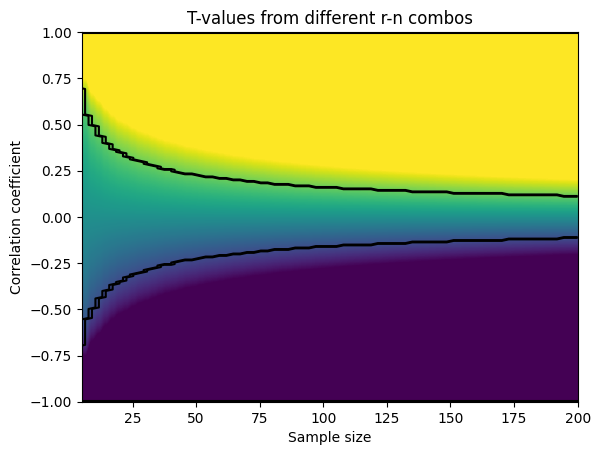

In [23]:
## 2D t-value space based on r and n

# define parameters
r = np.linspace(-1,1,248)
n = np.round( np.linspace(5,200,73) )

# initialize t-value matrix
tmatrix = np.zeros((len(r),len(n)))
pmatrix = np.zeros((len(r),len(n)))

for ri in range(len(r)):
    for ni in range(len(n)):

        # the t-value, split into num/den

        num = r[ri]*np.sqrt(n[ni]-2)
        den = 1-r[ri]**2

        # tmatrix[ri,ni] = num/den
        # pmatrix[ri,ni] = 1-stats.t.cdf(abs(num/den),n[ni]-2)

        # ==== resolve question: Why the warning message?

        if den != 0:
            tmatrix[ri,ni] = num / den
            pmatrix[ri,ni] = 1 - stats.t.cdf(abs(num / den), n[ni] - 2)
        else:
            tmatrix[ri,ni] = np.nan  # Or any placeholder value
            pmatrix[ri,ni] = np.nan



# Soooo curious to see it!
plt.imshow(tmatrix,vmin=-3,vmax=3,extent=[n[0],n[-1],r[0],r[-1]],aspect='auto',origin='lower')
plt.contour(pmatrix<.05,1,colors='k',extent=[n[0],n[-1],r[0],r[-1]])
plt.xlabel('Sample size')
plt.ylabel('Correlation coefficient')
plt.title('T-values from different r-n combos')
plt.show()

# question: Why the warning message?

# The warning message is caused by a division by zero in the lines where num/den is
# computed for both tmatrix and pmatrix. Specifically, when r[ri]=±1,
# the denominator den = 1 - r[ri]^2 becomes zero:

# When r=±1:

# The expression 1 - r[ri]**2 evaluates to =0.
# This causes den to be zero, leading to the division by zero in num/den.

In [24]:
# final note on statistical significance

r,p = stats.pearsonr(x,y)
print(r,p)

0.7978425323872967 1.060915788536687e-15
